In [2]:
train_conllu = "/Users/madalina/Documents/M2TAL/stage/check_coherent_labels/data/input/ro_rrt-ud-train.conllu"
test_conllu = "/Users/madalina/Documents/M2TAL/stage/check_coherent_labels/data/input/ro_rrt-ud-test.conllu"

In [3]:
import pyconll
import pandas as pd

def make_df(conll_file_path):
    """
    This function reads a conllu file and returns a pandas dataframe.
    """
    data = pyconll.load_from_file(conll_file_path)
    tokens =[]
    for sentence in data:
        for token in sentence:
            token_info = {
                'id': token.id,
                'form': token.form,
                'lemma': token.lemma,
                'upos': token.upos,
                'xpos': token.xpos,
                'head': token.head,
                'deprel': token.deprel,
                'deps': token.deps,
                'misc': token.misc
            }
            for key, value in token.feats.items():
                token_info[key] = value
            tokens.append(token_info)

    df = pd.DataFrame(tokens)
    return df

In [4]:
train_df = make_df(train_conllu)
test_df = make_df(test_conllu)

In [5]:
from sklearn.preprocessing import LabelEncoder

def encode_categorical_features(df, label_encoding_txt_path):
    """
    Encodes all categorical features in a DataFrame using label encoding.

    Parameters:
    df (pd.DataFrame): The input DataFrame.

    Returns:
    pd.DataFrame: The resulting DataFrame with all categorical features encoded using label encoding.
    """
    label_encoder = LabelEncoder()
    for column in df.columns:
        if column not in ['id', 'form', 'lemma', 'head']:
            df[column] = label_encoder.fit_transform(df[column].astype(str))
            mapping = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_).tolist()))
            # make a txt file to store the label encoding
            with open(label_encoding_txt_path, "a") as f:
                for key, value in mapping.items():
                    f.write(f"{column},{key},{value}\n")
    return df

In [6]:
train_df = encode_categorical_features(train_df, "label_encoding_train.txt")
test_df = encode_categorical_features(test_df, "label_encoding_test.txt")

In [7]:
columns_to_remove = ['form','lemma']
train_df.drop(columns=columns_to_remove, inplace=True)
test_df.drop(columns=columns_to_remove, inplace=True)

In [8]:
x_train = train_df.drop(columns=['deprel'])
y_train = train_df['deprel']
x_test = test_df.drop(columns=['deprel'])
y_test = test_df['deprel']

In [9]:
print(x_train.head())

  id  upos  xpos head  deps  misc  Case  Definite  Number  PronType  ...  \
0  1     5   355    2     0    38     3         1       2         1  ...   
1  2    11   206    4     0    38     0         0       0         0  ...   
2  3    10   272    4     0    38     2         0       2         7  ...   
3  4    14   430    0     0    38     0         0       2         0  ...   
4  5     7   190    4     0    38     5         1       2         0  ...   

   Polarity  Degree  Variant  Number[psor]  Poss  Reflex  PartType  Typo  \
0         0       0        0             0     0       0         0     0   
1         0       0        0             0     0       0         0     0   
2         0       0        0             0     0       0         0     0   
3         0       0        0             0     0       0         0     0   
4         0       0        0             0     0       0         0     0   

   Abbr  Foreign  
0     0        0  
1     0        0  
2     0        0  
3     0   

In [10]:
print(x_test.head())

  id  upos  xpos head  deps  misc  Case  Definite  Gender  Number  ...  \
0  1     7   135    0     0    12     5         1       2       2  ...   
1  2    10   198    3     0    12     5         0       0       0  ...   
2  3    14   283    1     0    12     0         0       0       2  ...   
3  4    14   277    3     0    12     0         0       0       0  ...   
4  5     2   222    8     0    12     0         0       0       0  ...   

   Polarity  NumForm  NumType  Position  Number[psor]  Poss  PartType  Abbr  \
0         0        0        0         0             0     0         0     0   
1         0        0        0         0             0     0         0     0   
2         0        0        0         0             0     0         0     0   
3         0        0        0         0             0     0         0     0   
4         0        0        0         0             0     0         0     0   

   Typo  Foreign  
0     0        0  
1     0        0  
2     0        0  
3   

In [11]:
x_test=x_test[x_train.columns]

In [12]:
print(len(y_train.unique()))

49


In [13]:
# Neural Network prediction
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report

# clf = MLPClassifier(hidden_layer_sizes=(49,2), max_iter=100, random_state=1)
clf = MLPClassifier(hidden_layer_sizes=(100,), max_iter=200, random_state=1)
clf.fit(x_train, y_train)

/Users/madalina/Documents/M2TAL/stage/check_coherent_labels/.venv/lib/python3.13/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(random_state=1)

In [14]:
y_pred = clf.predict(x_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.47      0.55      0.51       356
           1       0.48      0.34      0.40       226
           2       0.00      0.00      0.00         5
           3       0.71      0.62      0.66       692
           4       0.00      0.00      0.00        12
           5       0.71      0.88      0.78      1040
           6       0.00      0.00      0.00        87
           7       0.99      0.76      0.86       357
           8       0.46      0.72      0.56       121
           9       0.95      0.94      0.95      2072
          10       0.73      0.98      0.84       457
          11       0.00      0.00      0.00         7
          12       0.51      0.56      0.53       200
          13       0.00      0.00      0.00        24
          14       0.50      0.33      0.40         3
          15       0.28      0.25      0.26       614
          16       0.58      0.35      0.44       135
          17       0.05    

/Users/madalina/Documents/M2TAL/stage/check_coherent_labels/.venv/lib/python3.13/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/madalina/Documents/M2TAL/stage/check_coherent_labels/.venv/lib/python3.13/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/madalina/Documents/M2TAL/stage/check_coherent_labels/.venv/lib/python3.13/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_div

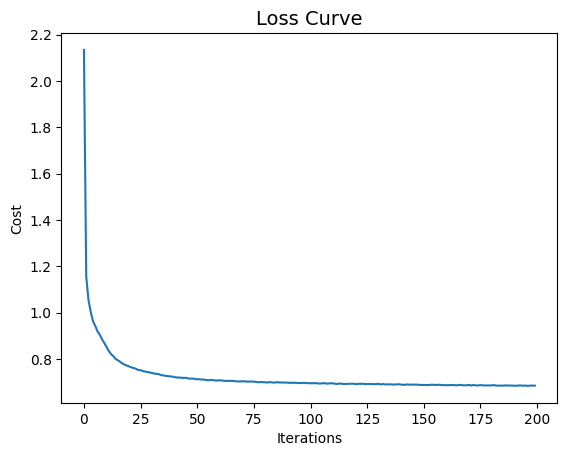

In [18]:
import matplotlib.pyplot as plt
plt.plot(clf.loss_curve_)
plt.title("Loss Curve", fontsize=14)
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.show()

In [19]:
from sklearn.model_selection import GridSearchCV
param_grid = {
    'hidden_layer_sizes': [(150,100,50), (120,80,40), (100,50,30)],
    'max_iter': [50, 100, 150],
    'activation': ['tanh', 'relu'],
    'solver': ['sgd', 'adam'],
    'alpha': [0.0001, 0.05],
    'learning_rate': ['constant','adaptive'],
}

grid = GridSearchCV(clf, param_grid, n_jobs= -1, cv=5)
grid.fit(x_train, y_train)

print(grid.best_params_) 

/Users/madalina/Documents/M2TAL/stage/check_coherent_labels/.venv/lib/python3.13/site-packages/sklearn/model_selection/_split.py:805: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(
/Users/madalina/Documents/M2TAL/stage/check_coherent_labels/.venv/lib/python3.13/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/madalina/Documents/M2TAL/stage/check_coherent_labels/.venv/lib/python3.13/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/madalina/Documents/M2TAL/stage/check_coherent_labels/.venv/lib/python3.13/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimize

{'activation': 'tanh', 'alpha': 0.0001, 'hidden_layer_sizes': (150, 100, 50), 'learning_rate': 'constant', 'max_iter': 150, 'solver': 'adam'}


/Users/madalina/Documents/M2TAL/stage/check_coherent_labels/.venv/lib/python3.13/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (150) reached and the optimization hasn't converged yet.
  warnings.warn(


In [15]:
def get_label_encoding(label_encoding_txt_path, feature):
    """
    Reads a label encoding txt file and returns a dictionary with the label encoding.

    Parameters:
    label_encoding_txt_path (str): The path to the label encoding txt file.
    feature: the feature that was predicted

    Returns:
    dict: The label encoding dictionary.
    """
    label_encoding = {}
    with open(label_encoding_txt_path, "r") as f:
        for line in f:
            elements =line.strip().split(",")
            column = elements[0]
            key = elements[1:-1]
            value = elements[-1]
            if column == feature:
                label_encoding[int(value)] = ''.join(key)
    return label_encoding

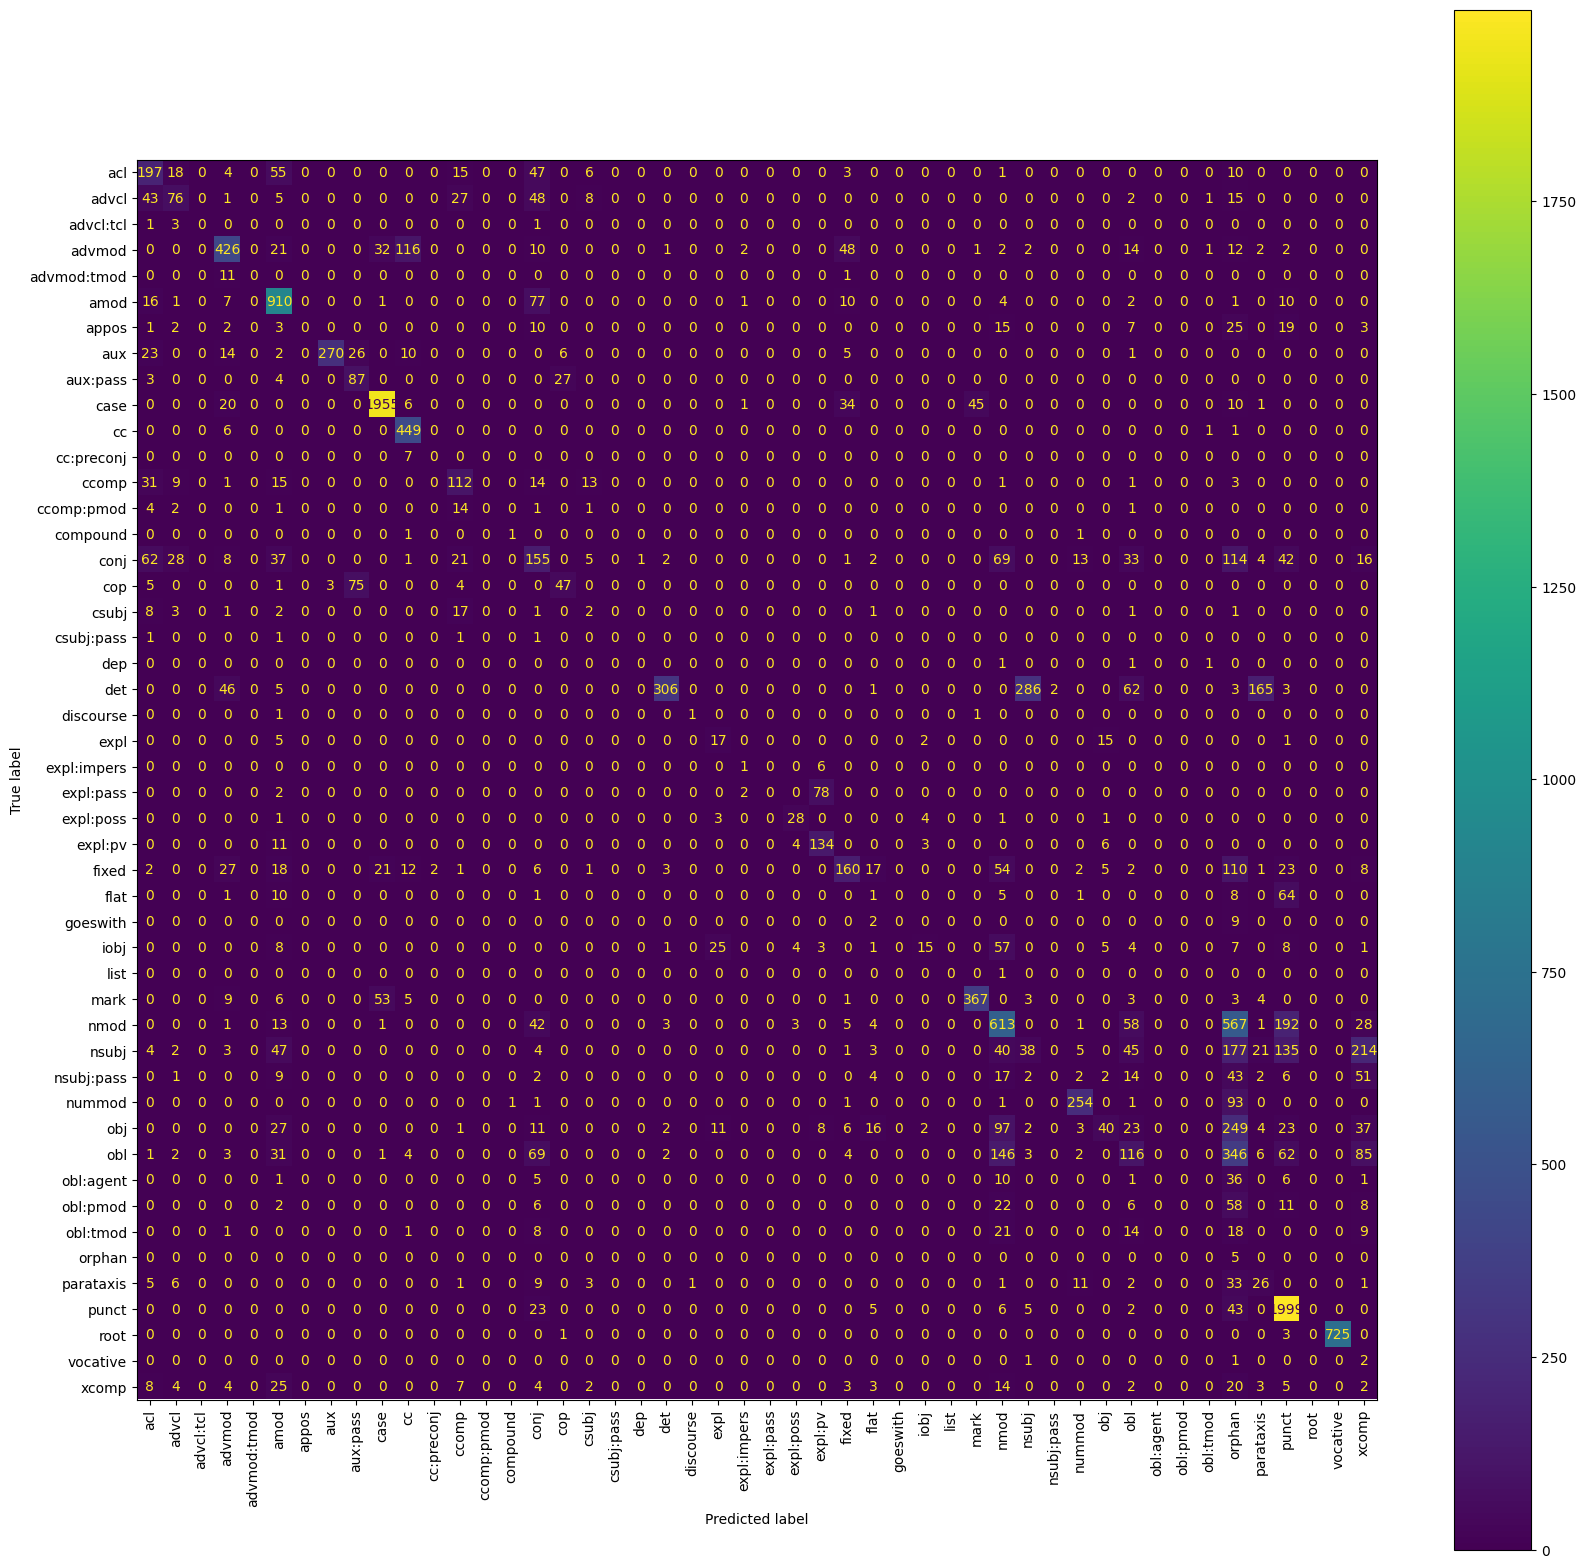

In [16]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

labels = get_label_encoding("label_encoding_test.txt", "deprel")
cm = confusion_matrix(y_test, y_pred, labels=list(labels.keys()))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=list(labels.values()))
# Increase figure size
fig, ax = plt.subplots(figsize=(20, 20))
disp.plot(ax=ax)

# Adjust font size
plt.xticks(fontsize=10, rotation=90)
plt.yticks(fontsize=10)
plt.show()


In [17]:
from sklearn.metrics import confusion_matrix
import numpy as np

def get_top_misclassifications(y_true, y_pred, labels, n=5):
    cm = confusion_matrix(y_true, y_pred, labels=list(labels.keys()))

    misclassifications = []

    for i in range(len(labels)):
        for j in range(len(labels)):
            if i != j:
                misclassifications.append((labels[i], labels[j], cm[i, j]))

    misclassifications.sort(key=lambda x: x[2], reverse=True)
    return misclassifications[:n]


labels = get_label_encoding("label_encoding_test.txt", "deprel")

top_misclassifications = get_top_misclassifications(y_test, y_pred, labels, n=10)

for true_label, predicted_label, count in top_misclassifications:
    print(f"True label: {true_label}, Predicted label: {predicted_label}, Count: {count}")

True label: root, Predicted label: vocative, Count: 725
True label: nmod, Predicted label: orphan, Count: 567
True label: obl, Predicted label: orphan, Count: 346
True label: det, Predicted label: nsubj, Count: 286
True label: obj, Predicted label: orphan, Count: 249
True label: nsubj, Predicted label: xcomp, Count: 214
True label: nmod, Predicted label: punct, Count: 192
True label: nsubj, Predicted label: orphan, Count: 177
True label: det, Predicted label: parataxis, Count: 165
True label: obl, Predicted label: nmod, Count: 146


In [20]:
# using the best hyperparameters for mlp classifier
# {'activation': 'tanh', 'alpha': 0.0001, 'hidden_layer_sizes': (150, 100, 50), 'learning_rate': 'constant', 'max_iter': 150, 'solver': 'adam'}
clf = MLPClassifier(hidden_layer_sizes=(150, 100, 50), max_iter=150, random_state=1, activation='tanh', alpha=0.0001, learning_rate='constant', solver='adam')
clf.fit(x_train, y_train)

/Users/madalina/Documents/M2TAL/stage/check_coherent_labels/.venv/lib/python3.13/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (150) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(activation='tanh', hidden_layer_sizes=(150, 100, 50),
              max_iter=150, random_state=1)

In [21]:
y_pred = clf.predict(x_test)

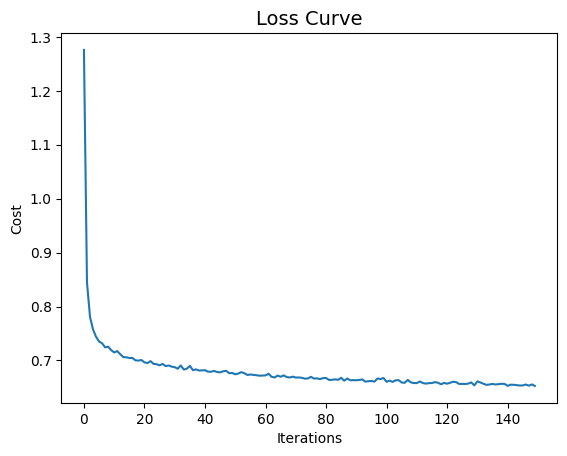

In [22]:
import matplotlib.pyplot as plt
plt.plot(clf.loss_curve_)
plt.title("Loss Curve", fontsize=14)
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.show()

In [23]:
from sklearn.metrics import confusion_matrix
import numpy as np

def get_top_misclassifications(y_true, y_pred, labels, n=5):
    cm = confusion_matrix(y_true, y_pred, labels=list(labels.keys()))

    misclassifications = []

    for i in range(len(labels)):
        for j in range(len(labels)):
            if i != j:
                misclassifications.append((labels[i], labels[j], cm[i, j]))

    misclassifications.sort(key=lambda x: x[2], reverse=True)
    return misclassifications[:n]


labels = get_label_encoding("label_encoding_test.txt", "deprel")

top_misclassifications = get_top_misclassifications(y_test, y_pred, labels, n=10)

for true_label, predicted_label, count in top_misclassifications:
    print(f"True label: {true_label}, Predicted label: {predicted_label}, Count: {count}")

True label: root, Predicted label: vocative, Count: 726
True label: obl, Predicted label: nmod, Count: 264
True label: obl, Predicted label: conj, Count: 252
True label: nmod, Predicted label: conj, Count: 182
True label: nmod, Predicted label: punct, Count: 152
True label: cc, Predicted label: advmod, Count: 148
True label: expl:pv, Predicted label: obj, Count: 139
True label: det, Predicted label: nsubj, Count: 138
True label: obj, Predicted label: nmod, Count: 134
True label: nsubj, Predicted label: obl, Count: 127


# Same experiment but on wolof

In [61]:
train_conllu = "/Users/madalina/Documents/M2TAL/stage/check_coherent_labels/data/input/wo_wtb-ud-train.conllu"
test_conllu = "/Users/madalina/Documents/M2TAL/stage/check_coherent_labels/data/input/wo_wtb-ud-test.conllu"

In [62]:
train_df = make_df(train_conllu)
test_df = make_df(test_conllu)

In [63]:
train_df = encode_categorical_features(train_df, "label_encoding_train.txt")
test_df = encode_categorical_features(test_df, "label_encoding_test.txt")

In [64]:
columns_to_remove = ['form','lemma']
train_df.drop(columns=columns_to_remove, inplace=True)
test_df.drop(columns=columns_to_remove, inplace=True)

In [65]:
x_train = train_df.drop(columns=['deprel'])
y_train = train_df['deprel']
x_test = test_df.drop(columns=['deprel'])
y_test = test_df['deprel']
x_test=x_test[x_train.columns]

In [66]:
# Print the columns of x_train and x_test
print("Columns in x_train:", x_train.columns)
print("Columns in x_test:", x_test.columns)

# Ensure x_test has the same columns as x_train
missing_cols = set(x_train.columns) - set(x_test.columns)
extra_cols = set(x_test.columns) - set(x_train.columns)

print("Missing columns in x_test:", missing_cols)
print("Extra columns in x_test:", extra_cols)

# Add missing columns to x_test with default values (e.g., 0)
for col in missing_cols:
    x_test[col] = 0

# Remove extra columns from x_test
x_test = x_test.drop(columns=extra_cols)

# Reorder columns to match x_train
x_test = x_test[x_train.columns]

# Check data types of x_train and x_test
print("Data types in x_train:", x_train.dtypes)
print("Data types in x_test:", x_test.dtypes)

# Ensure data types match
x_test = x_test.astype(x_train.dtypes)

Columns in x_train: Index(['id', 'upos', 'xpos', 'head', 'deps', 'misc', 'Case', 'Number',
       'Person', 'PronType', 'FocusType', 'Mood', 'Tense', 'VerbForm',
       'Aspect', 'Definite', 'NounClass', 'Deixis', 'DeixisRef', 'Poss',
       'Reflex', 'NumType', 'Polarity', 'Gender'],
      dtype='object')
Columns in x_test: Index(['id', 'upos', 'xpos', 'head', 'deps', 'misc', 'Case', 'Number',
       'Person', 'PronType', 'FocusType', 'Mood', 'Tense', 'VerbForm',
       'Aspect', 'Definite', 'NounClass', 'Deixis', 'DeixisRef', 'Poss',
       'Reflex', 'NumType', 'Polarity', 'Gender'],
      dtype='object')
Missing columns in x_test: set()
Extra columns in x_test: set()
Data types in x_train: id           object
upos          int64
xpos          int64
head         object
deps          int64
misc          int64
Case          int64
Number        int64
Person        int64
PronType      int64
FocusType     int64
Mood          int64
Tense         int64
VerbForm      int64
Aspect        int6

In [68]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.neural_network import MLPClassifier
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline

# Identify categorical columns
categorical_columns = x_train.select_dtypes(include=['object']).columns

# Create a ColumnTransformer with OneHotEncoder
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_columns)
    ],
    remainder='passthrough'  # Keep other columns as they are
)

# Create a pipeline with the preprocessor and the classifier
clf = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', MLPClassifier(hidden_layer_sizes=(150, 100, 50), max_iter=150, random_state=1, activation='tanh', alpha=0.0001, learning_rate='constant', solver='adam'))
])




In [69]:
clf = MLPClassifier(hidden_layer_sizes=(150, 100, 50), max_iter=150, random_state=1, activation='tanh', alpha=0.0001, learning_rate='constant', solver='adam')
clf.fit(x_train, y_train)

ValueError: Input X contains NaN.
MLPClassifier does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values

In [59]:
y_pred = clf.predict(x_test)

ValueError: could not convert string to float: '2-3'

In [47]:
# Check the feature names stored in the model
print("Feature names in the model:", clf.feature_names_in_)

Feature names in the model: ['id' 'upos' 'xpos' 'head' 'deps' 'misc' 'Case' 'Definite' 'Number'
 'PronType' 'Person' 'Strength' 'Mood' 'Tense' 'VerbForm' 'Gender'
 'Position' 'AdpType' 'NumForm' 'NumType' 'Polarity' 'Degree' 'Variant'
 'Number[psor]' 'Poss' 'Reflex' 'PartType' 'Typo' 'Abbr' 'Foreign']


In [44]:
# Ensure x_test has the same columns as x_train
missing_cols = set(x_train.columns) - set(x_test.columns)
extra_cols = set(x_test.columns) - set(x_train.columns)

# Add missing columns to x_test with default values (e.g., 0)
for col in missing_cols:
    x_test[col] = 0

# Remove extra columns from x_test
x_test = x_test.drop(columns=extra_cols)

# Reorder columns to match x_train
x_test = x_test[x_train.columns]

# Now you can make predictions
y_pred = clf.predict(x_test)
print(classification_report(y_test, y_pred))

ValueError: The feature names should match those that were passed during fit.
Feature names unseen at fit time:
- Aspect
- Deixis
- DeixisRef
- FocusType
- NounClass
Feature names seen at fit time, yet now missing:
- Abbr
- AdpType
- Degree
- Foreign
- NumForm
- ...


In [29]:
labels = get_label_encoding("label_encoding_test.txt", "deprel")

top_misclassifications = get_top_misclassifications(y_test, y_pred, labels, n=10)

for true_label, predicted_label, count in top_misclassifications:
    print(f"True label: {true_label}, Predicted label: {predicted_label}, Count: {count}")

ValueError: Found input variables with inconsistent numbers of samples: [10712, 16324]

# Same experiment but on Serbian

In [70]:
train_conllu = "/Users/madalina/Documents/M2TAL/stage/check_coherent_labels/data/input/sr_set-ud-train.conllu"
test_conllu = "/Users/madalina/Documents/M2TAL/stage/check_coherent_labels/data/input/sr_set-ud-test.conllu"

In [71]:
train_df = make_df(train_conllu)
test_df = make_df(test_conllu)
train_df = encode_categorical_features(train_df, "label_encoding_train.txt")
test_df = encode_categorical_features(test_df, "label_encoding_test.txt")
columns_to_remove = ['form','lemma']
train_df.drop(columns=columns_to_remove, inplace=True)
test_df.drop(columns=columns_to_remove, inplace=True)

x_train = train_df.drop(columns=['deprel'])
y_train = train_df['deprel']
x_test = test_df.drop(columns=['deprel'])
y_test = test_df['deprel']
x_test=x_test[x_train.columns]

In [72]:
clf = MLPClassifier(hidden_layer_sizes=(150, 100, 50), max_iter=150, random_state=1, activation='tanh', alpha=0.0001, learning_rate='constant', solver='adam')
clf.fit(x_train, y_train)

MLPClassifier(activation='tanh', hidden_layer_sizes=(150, 100, 50),
              max_iter=150, random_state=1)

In [73]:
y_pred = clf.predict(x_test)

In [74]:
labels = get_label_encoding("label_encoding_test.txt", "deprel")

top_misclassifications = get_top_misclassifications(y_test, y_pred, labels, n=10)

for true_label, predicted_label, count in top_misclassifications:
    print(f"True label: {true_label}, Predicted label: {predicted_label}, Count: {count}")

True label: nsubj, Predicted label: obl, Count: 573
True label: root, Predicted label: obj:caus, Count: 518
True label: punct, Predicted label: obj:appl, Count: 489
True label: nmod, Predicted label: root, Count: 403
True label: punct, Predicted label: case, Count: 391
True label: nmod, Predicted label: obj, Count: 379
True label: mark, Predicted label: nummod:gov, Count: 357
True label: obl, Predicted label: root, Count: 357
True label: obj, Predicted label: root, Count: 250
True label: obl, Predicted label: nmod, Count: 205
